In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/processed/Vacancy_new.csv', index_col=0, parse_dates = [2, 3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1701182 entries, 0 to 1701181
Data columns (total 16 columns):
 #   Column               Dtype         
---  ------               -----         
 0   car                  object        
 1   park_time            datetime64[ns]
 2   reservation_time     datetime64[ns]
 3   time_to_reservation  float64       
 4   park_location_lat    float64       
 5   park_location_long   float64       
 6   leave_location_lat   float64       
 7   leave_location_long  float64       
 8   park_zone            int64         
 9   leave_zone           int64         
 10  park_fuel            int64         
 11  leave_fuel           int64         
 12  engine               object        
 13  moved                float64       
 14  prev_customer        object        
 15  next_customer        object        
dtypes: datetime64[ns](2), float64(6), int64(4), object(4)
memory usage: 220.6+ MB


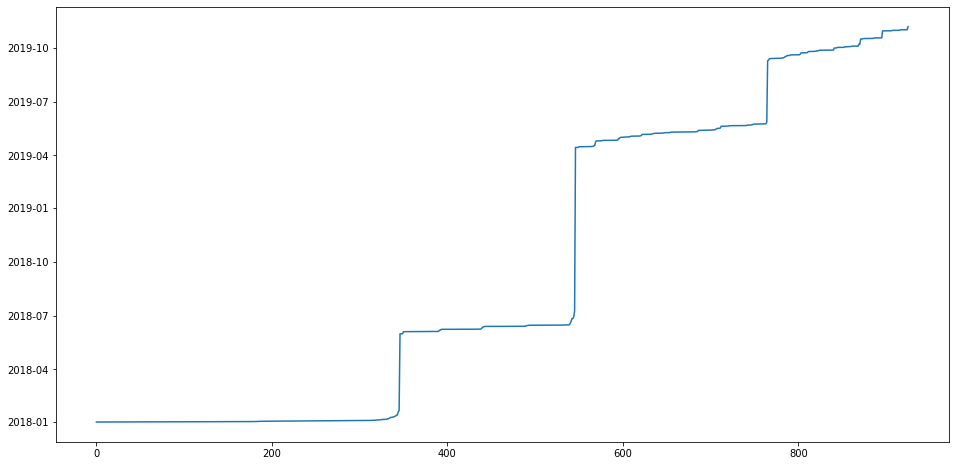

In [7]:
# When is the first tiem where all cars is available
CarID_dict = dict(iter(df.groupby('car')))

fc = pd.Series({car: min(sub_df['park_time']) for car, sub_df in CarID_dict.items()})
engine_dict = {car: sub_df['engine'].values[0] for car, sub_df in CarID_dict.items()}
    
plt.figure(figsize = (16,8))
plt.plot(fc.sort_values().values)
plt.show() # Det her skal un der preprocess

In [4]:
first_df = fc.sort_values().reset_index()
first_df.columns = ['car','time']
first_df['engine'] = first_df.car.map(engine_dict)
first_df.iloc[530:580]

,car,time,engine
530,WBA1R5108J5K58192,2018-06-15 11:31:19,118I
531,WBA1R5101J5K57918,2018-06-15 11:42:15,118I
532,WBA1R5107J5K57969,2018-06-15 12:12:16,118I
533,WMWXU7103KTM91317,2018-06-15 12:13:56,COOPER
534,WMWXU7106KTM91408,2018-06-15 12:28:03,COOPER
535,WMWXU7106KTM91411,2018-06-15 12:50:06,COOPER
536,WBA1R5103J7B13939,2018-06-15 13:03:01,118I
537,WMWXR3103KTK68690,2018-06-15 19:08:08,COOPER
538,WMWXU7101KTM91395,2018-06-15 21:28:11,COOPER
539,WBA1R5103J5K57967,2018-06-15 21:29:30,118I


In [5]:
park_df = df.drop(columns = 'reservation_time')
park_df['action'] = 'Park'
park_df.rename(columns = {'park_time':'time'}, inplace = True)
reserve_df = df.drop(columns = 'park_time')
reserve_df['action'] = 'Reservation'
reserve_df.rename(columns = {'reservation_time':'time'}, inplace = True)
df_split = pd.concat([park_df,reserve_df]).sort_values(by = 'time')

In [6]:
df_split = df_split.assign(movedTF = (df_split.moved > 100).astype(int))
df_split.reset_index(drop = True, inplace = True)
df_split.to_csv('data/processed/VacancySplit.csv')

In [8]:
df_split

,car,time,time_to_reservation,park_location_lat,park_location_long,leave_location_lat,leave_location_long,park_zone,leave_zone,park_fuel,leave_fuel,engine,moved,prev_customer,next_customer,action,movedTF
0,WBY1Z21050V307962,2018-01-01 00:28:59,1.121667,55.632660,12.573803,55.632660,12.573803,103291,103291,52,33,I3,0.0,Customer,Customer,Park,0
1,WBY1Z21080V307860,2018-01-01 00:33:52,1.186111,55.679465,12.566393,55.679465,12.566393,102152,102152,33,33,I3,0.0,Customer,Customer,Park,0
2,WBY1Z21090V308046,2018-01-01 00:37:20,18.996667,55.710699,12.474526,55.710699,12.474526,102661,102661,20,20,I3,0.0,Customer,Customer,Park,0
3,WBY1Z21090V307902,2018-01-01 00:37:37,1.484722,55.704681,12.501310,55.704681,12.501310,102615,102615,55,53,I3,0.0,Customer,Customer,Park,0
4,WBY1Z6100HV939142,2018-01-01 00:39:40,3.329444,55.645502,12.636549,55.645502,12.636549,103211,103211,76,76,I3 94,0.0,Customer,Customer,Park,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3402359,WBY8P2105K7D77234,2019-12-31 23:37:12,0.800556,55.672061,12.489302,55.672061,12.489302,102771,102771,16,16,I3 120,0.0,Customer,Customer,Reservation,0
3402360,WBY8P2100K7D93129,2019-12-31 23:40:15,4.764167,55.708768,12.530076,55.708768,12.530076,102533,102533,58,58,I3 120,0.0,Customer,Customer,Reservation,0
3402361,WBY8P2102K7E72639,2019-12-31 23:40:32,5.254167,55.696589,12.588531,55.696589,12.588531,102351,102351,50,50,I3 120,0.0,Customer,Customer,Reservation,0
3402362,WBY8P2102K7D70287,2019-12-31 23:41:09,0.226667,55.691270,12.572398,55.691270,12.572398,102213,102213,46,46,I3 120,0.0,Customer,Customer,Reservation,0


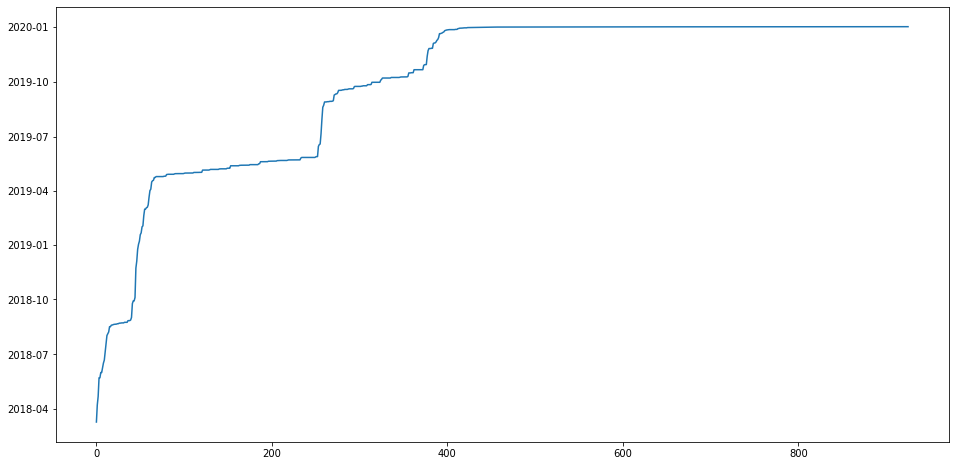

In [11]:
plt.figure(figsize = (16,8))
plt.plot(pd.Series({car: max(sub_df['reservation_time']) for car, sub_df in CarID_dict.items()}).sort_values().values)
plt.show() # Det her skal un der preprocess

In [ ]:
#df546 = df546[df546.time >= pd.Timestamp('2018-07-09 14:27:00')]